In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import MinMaxScaler

from pyfrechet.metric_spaces import MetricData, Sphere, Euclidean
from pyfrechet.regression.bagged_regressor import BaggedRegressor
from pyfrechet.regression.trees import Tree
from pyfrechet.metrics import mse

from geomstats.geometry.hypersphere import Hypersphere

INFO: Using numpy backend


# Simulation study of OOB Balls

## Syntetic Data on the Circle

### Sample 1

In [158]:
path='C:/Users/J2404/OneDrive/Documentos/UNIVERSIDAD/MÁSTER/TFM/R (TFM)/'
file_name='S1Data_sample1.csv'
sample1=pd.read_csv(path+file_name)
sample1.head()

,theta,t
0,-0.435467,0.004075
1,-0.554753,0.004548
2,-0.371468,0.006390
3,-0.403668,0.008407
4,-0.314433,0.009653


In [163]:
M=Sphere(1)
X=sample1[['t']].values
y=MetricData(M, Hypersphere(dim=1).angle_to_extrinsic(sample1[['theta']].values)[:,0,:])

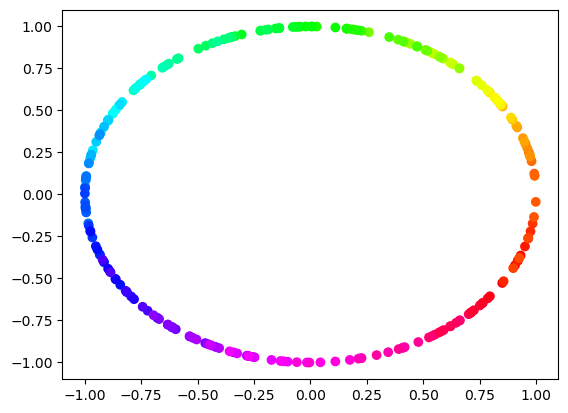

In [175]:
plt.figure()
plt.scatter(y.data[:,0], y.data[:,1], label='Reference', c=np.arange(y.data.shape[0]), cmap='hsv')
plt.show()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [166]:
base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=5)
forest = BaggedRegressor(estimator=base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=-2)
forest.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  1.7min finished


BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(split_type='2means'))

In [176]:
forest_predictions = forest.predict(X_test)
print(f'MSE: {mse(y_test, forest_predictions)}')

MSE: 0.01919701071779179


In [177]:
forest_fitted = forest.predict(X_train)
print(f'MSE: {mse(y_train, forest_fitted)}')

MSE: 0.014144509761041936


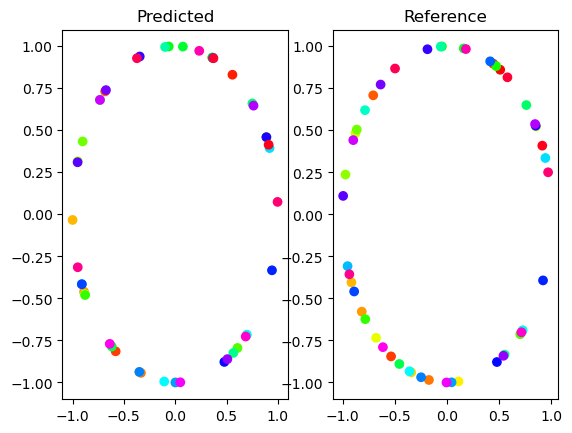

In [183]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(forest_predictions.data[:,0], forest_predictions.data[:,1], c=np.arange(y_test.data.shape[0]), cmap='hsv')
ax[0].set_title('Predicted')
ax[1].scatter(y_test.data[:,0], y_test.data[:,1], c=np.arange(y_test.data.shape[0]), cmap='hsv')
ax[1].set_title('Reference')
plt.show()

## Syntetic data on the Sphere

### Sample 1


In [135]:
path='C:/Users/J2404/OneDrive/Documentos/UNIVERSIDAD/MÁSTER/TFM/R (TFM)/'
file_name='S2Data_sample1.csv'
sample1=pd.read_csv(path+file_name)
print(sample1.head())
print(sample1.shape)

     samp.1    samp.2       U.1       U.2
0  1.680986  6.261536 -0.999994 -0.003494
1  1.587754  6.227366 -0.999840 -0.017871
2  1.549479  6.195936 -0.999165 -0.040850
3  1.594631  6.186913 -0.998268 -0.058837
4  1.620561  6.186977 -0.997948 -0.064033
(400, 4)


In [136]:
M=Sphere(2)
#X=sample1[['ph']].values
X=(np.arange(sample1.shape[0])/sample1.shape[0]).reshape((-1,1))
y=MetricData(M, Hypersphere(dim=2).spherical_to_extrinsic(sample1[['samp.2', 'samp.1']].values))

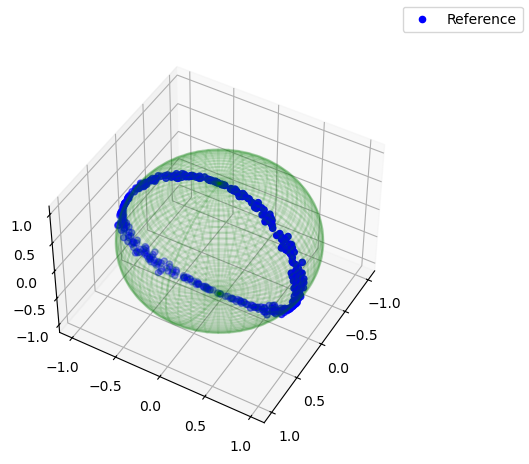

In [137]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure()
ax=plt.axes(projection='3d')
y_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(y.data)
ax.scatter3D(y.data[:,0],
            y.data[:,1],
            y.data[:,2], color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)
ax.view_init(elev=45, azim=30)
fig.legend()

plt.show()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

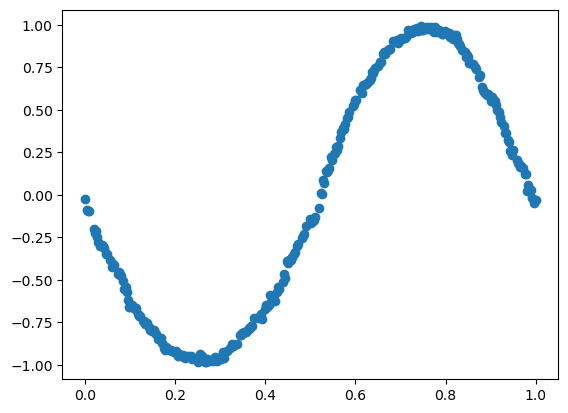

In [96]:
plt.figure()
plt.scatter(X_train, y_train.data[:,1])
plt.show()

In [97]:
base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=5)
forest = BaggedRegressor(estimator=base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=-2)
forest.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.6min finished


BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(split_type='2means'))

In [98]:
forest_predictions = forest.predict(X_test)
print(f'MSE: {mse(y_test, forest_predictions)}')

MSE: 0.0033861890806909634


In [99]:
forest_fitted = forest.predict(X_train)
print(f'MSE: {mse(y_train, forest_fitted)}')

MSE: 0.0029358501749628973


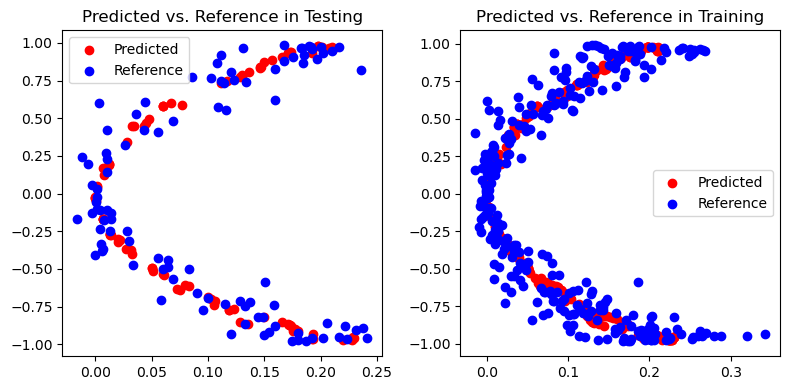

In [100]:

fig, axs=plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(forest_predictions.data[:,0], forest_predictions.data[:,1], color='red', label='Predicted')
axs[0].scatter(y_test.data[:,0], y_test.data[:,1], color='blue', label='Reference')
axs[0].legend()
axs[0].set_title('Predicted vs. Reference in Testing')
axs[1].scatter(forest_fitted.data[:,0], forest_fitted.data[:,1], color='red', label='Predicted')
axs[1].scatter(y_train.data[:,0], y_train.data[:,1], color='blue', label='Reference')
axs[1].legend()
axs[1].set_title('Predicted vs. Reference in Training')
plt.tight_layout()
plt.show()

In [105]:
print(y_test.data[:5,:])
print(forest_predictions.data[:5,:])
print(np.linalg.norm(forest_predictions.data[:5,:], axis=1)) # Check that predictions are on the unit sphere

[[ 0.15940198  0.62348811 -0.76541073]
 [ 0.13076873  0.96837794  0.21247049]
 [ 0.08301929 -0.49788603 -0.86325969]
 [ 0.21033981  0.94671054 -0.24391866]
 [ 0.00642512 -0.36580853 -0.93066795]]
[[ 0.06729787  0.59923857 -0.79773688]
 [ 0.21018019  0.95592174  0.2050315 ]
 [ 0.06127618 -0.53737893 -0.84111183]
 [ 0.17373011  0.93956754 -0.29500965]
 [ 0.02731755 -0.36606093 -0.93018984]]
[1. 1. 1. 1. 1.]


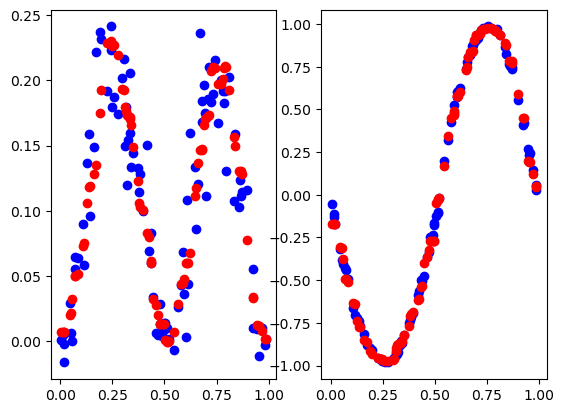

In [102]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(X_test, y_test.data[:,0], color='blue', label='Reference')
ax[0].scatter(X_test, forest_predictions.data[:,0], color='red', label='Prediction')
ax[1].scatter(X_test, y_test.data[:,1], color='blue', label='Reference')
ax[1].scatter(X_test, forest_predictions.data[:,1], color='red', label='Prediction')
plt.show()

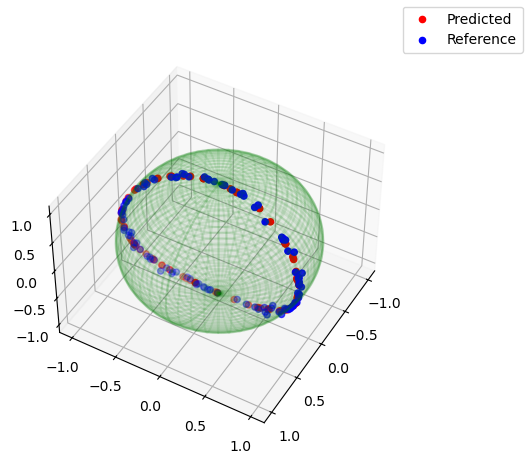

In [107]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(forest_predictions.data[:,0],
            forest_predictions.data[:,1],
            forest_predictions.data[:,2], color='red', label='Predicted')
y_test_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(y_test.data)
ax.scatter3D(y_test.data[:,0],
            y_test.data[:,1],
            y_test.data[:,2], color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)
ax.view_init(elev=45, azim=30)
fig.legend()

plt.show()

In [104]:
# Quantile for confidence balls
alpha=0.05
Dalpha=np.percentile(forest.oob_errors(), (1-alpha)*100)
np.mean(y_train.M.d(forest_predictions.data, y_test.data) <= Dalpha)

0.99

### Sample 2

In [184]:
path='C:/Users/J2404/OneDrive/Documentos/UNIVERSIDAD/MÁSTER/TFM/R (TFM)/'
file_name='S2Data_sample2.csv'
sample1=pd.read_csv(path+file_name)
print(sample1.head())
print(sample1.shape)

     samp.1    samp.2        ph
0  1.599907  4.712303  0.001963
1  1.582323  4.709308  0.019794
2  1.576008  4.712145  0.025810
3  1.572362  4.709550  0.029625
4  1.568931  4.712228  0.032883
(400, 3)


In [185]:
M=Sphere(2)
#X=sample1[['ph']].values
X=(np.arange(sample1.shape[0])/sample1.shape[0]).reshape((-1,1))
y=MetricData(M, Hypersphere(dim=2).spherical_to_extrinsic(sample1[['samp.2', 'samp.1']].values))

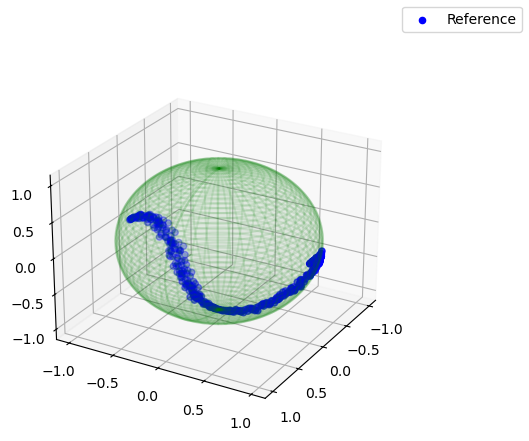

In [186]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure()
ax=plt.axes(projection='3d')
y_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(y.data)
ax.scatter3D(y.data[:,0],
            y.data[:,1],
            y.data[:,2], color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)
ax.view_init(elev=25, azim=30)
fig.legend()

plt.show()

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [188]:
base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=5)
forest = BaggedRegressor(estimator=base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=-2)
forest.fit(X_train, y_train)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:  2.5min finished


BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(split_type='2means'))

In [192]:
forest_predictions = forest.predict(X_test)
print(f'MSE: {mse(y_test, forest_predictions)}')

MSE: 0.0031909060812237732


In [193]:
forest_fitted = forest.predict(X_train)
print(f'MSE: {mse(y_train, forest_fitted)}')

MSE: 0.002149834769609139


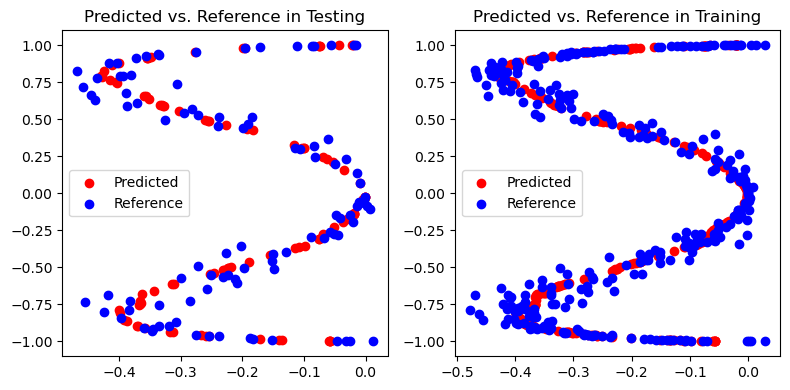

In [194]:
fig, axs=plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(forest_predictions.data[:,0], forest_predictions.data[:,1], color='red', label='Predicted')
axs[0].scatter(y_test.data[:,0], y_test.data[:,1], color='blue', label='Reference')
axs[0].legend()
axs[0].set_title('Predicted vs. Reference in Testing')
axs[1].scatter(forest_fitted.data[:,0], forest_fitted.data[:,1], color='red', label='Predicted')
axs[1].scatter(y_train.data[:,0], y_train.data[:,1], color='blue', label='Reference')
axs[1].legend()
axs[1].set_title('Predicted vs. Reference in Training')
plt.tight_layout()
plt.show()

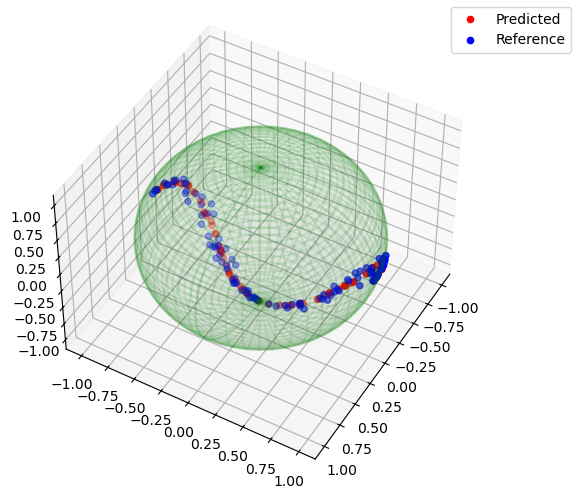

In [321]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(forest_predictions.data[:,0],
            forest_predictions.data[:,1],
            forest_predictions.data[:,2], color='red', label='Predicted')
y_test_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(y_test.data)
ax.scatter3D(y_test.data[:,0],
            y_test.data[:,1],
            y_test.data[:,2], color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)
ax.view_init(elev=45, azim=30)
fig.legend()
plt.tight_layout()
plt.show()

In [196]:
# Quantile for confidence balls
alpha=0.05
Dalpha=np.percentile(forest.oob_errors(), (1-alpha)*100)
np.mean(y_train.M.d(forest_predictions.data, y_test.data) <= Dalpha)

0.94

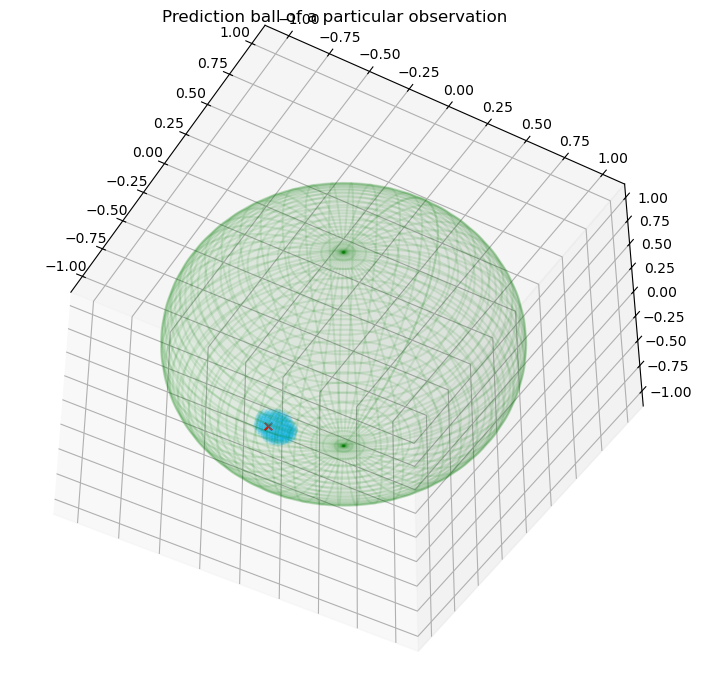

In [319]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 200)
v = np.linspace(0, np.pi, 200)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure(figsize=(12,7))
ax=plt.axes(projection='3d')
ax.scatter3D(forest_predictions.data[25,0],
            forest_predictions.data[25,1],
            forest_predictions.data[25,2], marker='x', color='red', s=30, alpha=0)
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)


for i in range(z_grid.shape[0]):
    for j in range(z_grid.shape[1]):
        if forest_predictions.M.d(forest_predictions.data[25,:], np.array([x_grid[i,j], y_grid[i,j], z_grid[i,j]])) <= Dalpha:
            ax.scatter3D(x_grid[i,j], y_grid[i,j], z_grid[i,j], color='deepskyblue', alpha=0.1)

ax.scatter3D(y_test.data[25,0], y_test.data[25,1], y_test.data[25,2], marker='x', color='red', s=30, alpha=1)
ax.set_title('Prediction ball of a particular observation')

ax.view_init(elev=-45, azim=-30)
plt.tight_layout()
plt.show()

In [265]:
Dalpha

0.11293937567576057

### Sample 3

## Sunspots Dataset

In [108]:
path='C:/Users/J2404/OneDrive/Documentos/UNIVERSIDAD/MÁSTER/TFM/R (TFM)/'
file_name='sunspots_births.csv'
sunspots=pd.read_csv(path+file_name)
print(sunspots.head())
print(sunspots.info())

                  date  cycle  total_area  dist_sun_disc     theta       phi
0  1874-04-17 11:38:00     11         113          0.388  1.977458  0.101229
1  1874-04-27 13:20:01     11         171          0.899  5.166175 -0.216421
2  1874-04-30 13:50:01     11          24          0.284  5.785766  0.137881
3  1874-05-01 12:56:00     11          42          0.893  4.265585 -0.064577
4  1874-05-06 10:22:00     11         248          0.951  2.993240  0.113446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51303 entries, 0 to 51302
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           51303 non-null  object 
 1   cycle          51303 non-null  int64  
 2   total_area     51303 non-null  int64  
 3   dist_sun_disc  51303 non-null  float64
 4   theta          51303 non-null  float64
 5   phi            51303 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.3+ MB
None


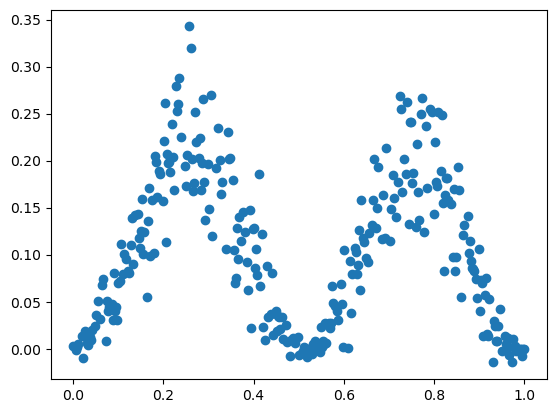

In [110]:
plt.figure()
plt.scatter(X_train, y_train.data[:,0])
plt.show()

In [111]:
# Subsample for computational reasons
sub_sunspots=sunspots.sample(n=10000, random_state=100)
M=Sphere(2)
X=sub_sunspots[['total_area']].values
y=MetricData(M, Hypersphere(dim=2).spherical_to_extrinsic(sub_sunspots[['theta','phi']].values))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
base = Tree(split_type='2means',
            impurity_method='cart',
            mtry=None,
            min_split_size=15)
forest = BaggedRegressor(estimator=base,
                         n_estimators=100,
                         bootstrap_fraction=1,
                         bootstrap_replace=True,
                         n_jobs=4)
forest.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 12.6min finished


BaggedRegressor(bootstrap_fraction=1, bootstrap_replace=True,
                estimator=Tree(min_split_size=15, split_type='2means'),
                n_jobs=4)

In [114]:
forest_predictions = forest.predict(X_test)
print(f'MSE: {mse(y_test, forest_predictions)}')

MSE: 2.6176097750795537


In [115]:
forest_fitted = forest.predict(X_train)
print(f'MSE: {mse(y_train, forest_fitted)}')

MSE: 2.5217210265307735


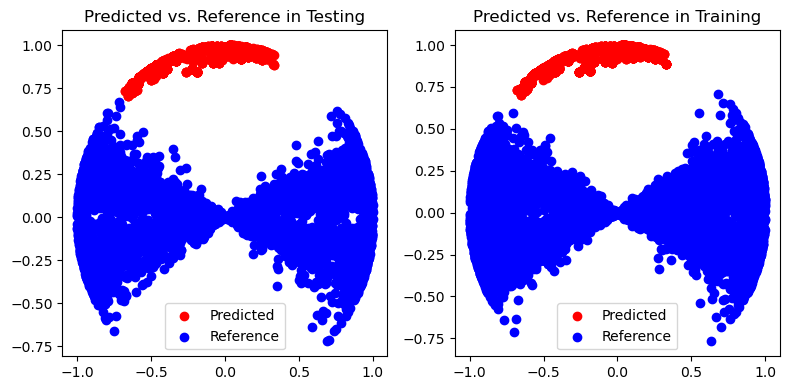

In [119]:
fig, axs=plt.subplots(1,2, figsize=(8,4))
axs[0].scatter(forest_predictions.data[:,0], forest_predictions.data[:,1], color='red', label='Predicted')
axs[0].scatter(y_test.data[:,0], y_test.data[:,1], color='blue', label='Reference')
axs[0].legend()
axs[0].set_title('Predicted vs. Reference in Testing')
axs[1].scatter(forest_fitted.data[:,0], forest_fitted.data[:,1], color='red', label='Predicted')
axs[1].scatter(y_train.data[:,0], y_train.data[:,1], color='blue', label='Reference')
axs[1].legend()
axs[1].set_title('Predicted vs. Reference in Training')
plt.tight_layout()
plt.show()

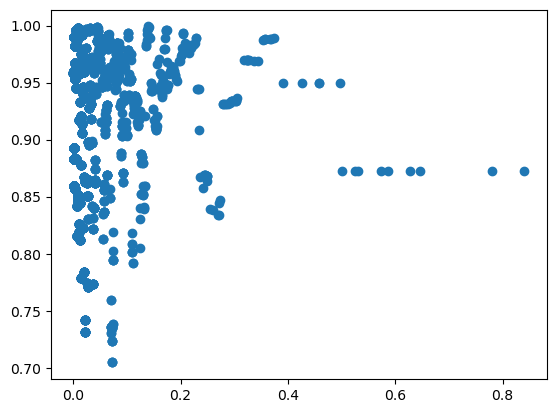

In [120]:
plt.figure()
plt.scatter(X_test, forest_predictions.data[:,1])
plt.show()

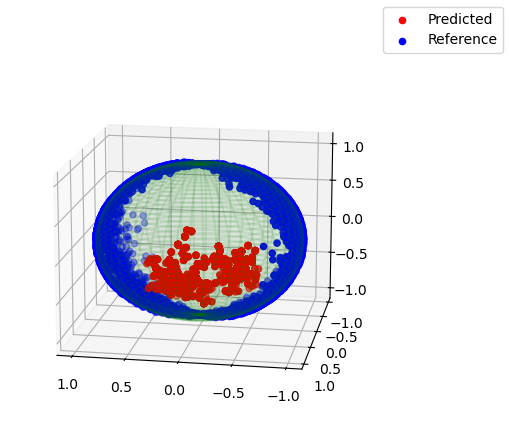

In [134]:
# For plotting the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_grid = np.outer(np.cos(u), np.sin(v))
y_grid = np.outer(np.sin(u), np.sin(v))
z_grid = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot random forest predictions
#forest_predictions_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(forest_predictions.data)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(forest_predictions.data[:,0],
            forest_predictions.data[:,1],
            forest_predictions.data[:,2], color='red', label='Predicted')
y_test_cartesian = Hypersphere(dim=2).spherical_to_extrinsic(y_test.data)
ax.scatter3D(y_test.data[:,0],
            y_test.data[:,1],
            y_test.data[:,2], color='blue', label='Reference')
ax.plot_surface(x_grid, y_grid, z_grid, color='green', alpha=0.05)
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.1)
ax.view_init(elev=15, azim=100)
fig.legend()

plt.show()